In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import cv2, glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog

In [3]:
cars = glob.glob('../Data/vehicles_smallset/cars1/*.jpeg') + glob.glob('../Data/vehicles_smallset/cars2/*.jpeg') + glob.glob('../Data/vehicles_smallset/cars3/*.jpeg')
non_cars = glob.glob('../Data/non-vehicles_smallset/notcars1/*.jpeg') + glob.glob('../Data/non-vehicles_smallset/notcars2/*.jpeg') + glob.glob('../Data/non-vehicles_smallset/notcars3/*.jpeg')

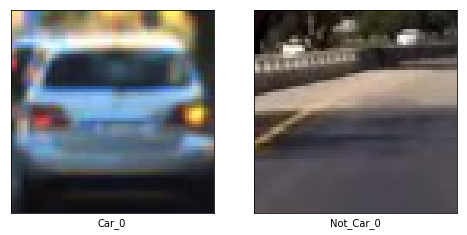

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 16))
plt.setp(axes.flat, xticks = [], yticks = [])
c = 0
for i, ax in enumerate(axes.flat):
    if i % 2 == 0:
        ax.imshow(mpimg.imread(cars[np.random.randint(0, len(cars))]))
        ax.set_xlabel('Car_' + str(c))
    if i % 2 == 1:
        ax.imshow(mpimg.imread(non_cars[np.random.randint(0, len(non_cars))]))
        ax.set_xlabel('Not_Car_' + str(c))
        c += 1
plt.show()

In [5]:
def get_hog_features(image, orientations, pixels_per_cell, cells_per_block):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    hog_features, hog_image = hog(image, orientations = orientations,
                                  pixels_per_cell = (pixels_per_cell, pixels_per_cell),
                                  cells_per_block = (cells_per_block, cells_per_block),
                                  visualise = True, feature_vector = False,
                                  block_norm = "L2-Hys")
    return hog_features, hog_image

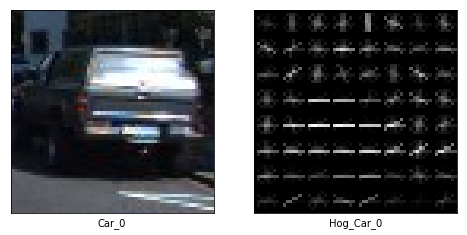

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 16))
plt.setp(axes.flat, xticks = [], yticks = [])
c = 0
for i, ax in enumerate(axes.flat):
    image = mpimg.imread(cars[np.random.randint(0, len(cars))])
    hog_features, hog_image = get_hog_features(image, 9, 8, 2)
    if i % 2 == 0:
        ax.imshow(image)
        ax.set_xlabel('Car_' + str(c))
    if i % 2 == 1:
        ax.imshow(hog_image, cmap = 'gray')
        ax.set_xlabel('Hog_Car_' + str(c))
        c += 1
plt.show()